In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

import torch.nn as nn
import torch.nn.functional as F

import torch.optim as optim

In [2]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

True
1
NVIDIA GeForce RTX 4070 Ti SUPER


In [5]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print("Data is upToDate")

Data is upToDate


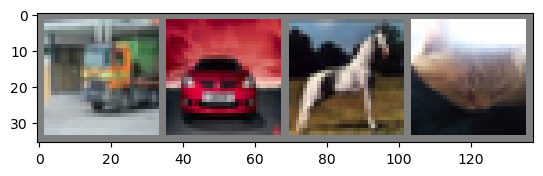

truck car   horse cat  


In [7]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [9]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3, padding=1)  # Увеличили фильтры
        self.bn1 = nn.BatchNorm2d(32)
        self.conv2 = nn.Conv2d(32, 64, 3, padding=1)
        self.bn2 = nn.BatchNorm2d(64)
        self.conv3 = nn.Conv2d(64, 128, 3, padding=1)  # Новый слой
        self.bn3 = nn.BatchNorm2d(128)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(0.5)  # Dropout 50%
        self.fc1 = nn.Linear(128 * 4 * 4, 512)  # Подстройте размер, если вход 32x32
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.pool(F.leaky_relu(self.bn1(self.conv1(x))))
        x = self.pool(F.leaky_relu(self.bn2(self.conv2(x))))
        x = self.pool(F.leaky_relu(self.bn3(self.conv3(x))))
        x = torch.flatten(x, 1)
        x = self.dropout(F.leaky_relu(self.fc1(x)))
        x = self.dropout(F.leaky_relu(self.fc2(x)))
        x = self.fc3(x)
        return x

In [11]:
net = Net().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net.parameters(), lr=0.0001)

for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.979
[1,  4000] loss: 1.650
[1,  6000] loss: 1.489
[1,  8000] loss: 1.376
[1, 10000] loss: 1.307
[1, 12000] loss: 1.285
[2,  2000] loss: 1.182
[2,  4000] loss: 1.141
[2,  6000] loss: 1.109
[2,  8000] loss: 1.089
[2, 10000] loss: 1.060
[2, 12000] loss: 1.047
[3,  2000] loss: 0.981
[3,  4000] loss: 0.995
[3,  6000] loss: 0.955
[3,  8000] loss: 0.967
[3, 10000] loss: 0.939
[3, 12000] loss: 0.943
[4,  2000] loss: 0.853
[4,  4000] loss: 0.855
[4,  6000] loss: 0.894
[4,  8000] loss: 0.880
[4, 10000] loss: 0.853
[4, 12000] loss: 0.829
[5,  2000] loss: 0.789
[5,  4000] loss: 0.787
[5,  6000] loss: 0.789
[5,  8000] loss: 0.784
[5, 10000] loss: 0.775
[5, 12000] loss: 0.802
[6,  2000] loss: 0.717
[6,  4000] loss: 0.738
[6,  6000] loss: 0.718
[6,  8000] loss: 0.731
[6, 10000] loss: 0.743
[6, 12000] loss: 0.709
[7,  2000] loss: 0.679
[7,  4000] loss: 0.685
[7,  6000] loss: 0.660
[7,  8000] loss: 0.668
[7, 10000] loss: 0.681
[7, 12000] loss: 0.680
[8,  2000] loss: 0.619
[8,  4000] 

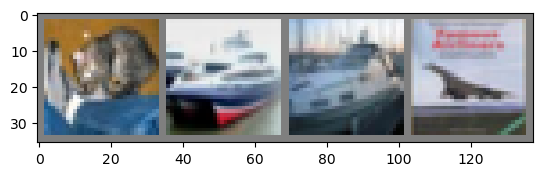

GroundTruth:  cat   ship  ship  plane


<All keys matched successfully>

In [13]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))
net = Net()
net.load_state_dict(torch.load(PATH, weights_only=True))

In [15]:
outputs = net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   car   plane plane


In [17]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 74 %


In [19]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 77.4 %
Accuracy for class: car   is 82.5 %
Accuracy for class: bird  is 63.3 %
Accuracy for class: cat   is 48.1 %
Accuracy for class: deer  is 67.3 %
Accuracy for class: dog   is 73.5 %
Accuracy for class: frog  is 82.1 %
Accuracy for class: horse is 81.1 %
Accuracy for class: ship  is 76.0 %
Accuracy for class: truck is 90.1 %
